### Уровень 0
#### Задание 1
Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов (решение на бумажке и на python).

Простые числа меньше 15: 2, 3, 5, 7, 11, 13

Вероятность выпадения ровно двух орлов:
$ \frac{15\cdot14}{2!}\cdot\frac{1}{2^{15}} = 105\cdot\frac{1}{2^{15}} $

Вероятность выпадения ровно трёх орлов:
$ \frac{15\cdot14\cdot13}{3!}\cdot\frac{1}{2^{15}} = 455\cdot\frac{1}{2^{15}} $


Вероятность выпадения ровно пяти орлов:
$ \frac{15!}{(15 - 5)!\cdot5!}\cdot\frac{1}{2^{15}} = 3003\cdot\frac{1}{2^{15}} $


Вероятность выпадения ровно семи орлов:
$ \frac{15!}{(15 - 7)!\cdot7!}\cdot\frac{1}{2^{15}} = 6435\cdot\frac{1}{2^{15}} $


Вероятность выпадения ровно одиннадцати орлов:
$ \frac{15!}{(15 - 11)!\cdot11!}\cdot\frac{1}{2^{15}} = 1365\cdot\frac{1}{2^{15}} $

Вероятность выпадения ровно 13 орлов:
$ \frac{15!}{(15 - 13)!\cdot13!}\cdot\frac{1}{2^{15}} = 105\cdot\frac{1}{2^{15}} $

Вероятность выпадения простого числа орлов:
$ (105 + 455 + 3003 + 6435 + 1365 + 105)\cdot\frac{1}{2^{15}} \approx 0.35 $

In [7]:
# Monte carlo solution
from random import choice

succesess = [2, 3, 5, 7, 11, 13]
n_full = 1_000_000
full_success = 0
for i in range(n_full):
    trial_success = 0
    for j in range(15):
        trial_success += choice([0,1])
    if trial_success in succesess:
        full_success += 1
print('Probability of simple number of heads is', full_success/n_full)

Probability of simple number of heads is 0.350766


In [10]:
# Brute force search
n_of_good_ends = 0
for i in range(int(2**15)):
        b = bin(i)
        trial = sum(int(x) for x in str(b)[2:])
        if trial in succesess:
            n_of_good_ends += 1
print('Probability of simple number of heads is', n_of_good_ends/2**15)

Probability of simple number of heads is 0.3499755859375


### Задание 2
Создайте свою дискретную случайную величину с не менее, чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

In [12]:
my_var = (1, 2, 2, 3, 4, 4, 5, 6, 6, 7, 8, 8, 9, 10, 10)

sample = []
for i in range(1000):
    sample.append(choice(my_var))

In [15]:
from statistics import mean, median, variance
print("Среднее выборки ", mean(sample))
print('Медиана выборки', median(sample))
print('Дисперсия выборки', variance(sample))

Среднее выборки  5.706
Медиана выборки 6.0
Дисперсия выборки 8.403967967967969


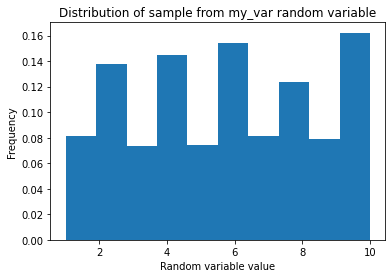

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax_1 = ax.hist(sample, density=True)
ax.set_xlabel('Random variable value')
ax.set_ylabel('Frequency')
t = plt.title('Distribution of sample from my_var random variable')

### Уровень 1

#### Задание 3

Пусть брошены 3 уравновешенные монеты. Рассмотрим 3 события:

$A_1$ - монеты 1 и 2 упали одной и той же стороной,

$A_2$ - монеты 2 и 3 упали одной и той же стороной,

$A_3$ - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события являются попарно независимыми, но не являются независимыми в совокупности.




Изобразим всю группу событий:
$ 0 0 0 - A_1, A_2, A_3 $

$ 0 0 1 - A_1, A_2 $

$ 0 1 0 - A_3 $

$ 0 1 1 - A_2 $

$ 1 0 0 - A_2 $

$ 1 0 1 - A_3 $

$ 1 1 0 - A_1 $

$ 1 1 1 - A_1, A_2, A_3 $

$ P(A_1) = P(A_2) = P(A_3) = 1/2 $

$ P(A_1, A_2) = P(A_2, A_3) = P(A_1, A_3) = P(A_1)\cdot P(A_2) = P(A_2) \cdot P(A_3) = P(A_1) \cdot P(A_3) = 1/4 $
$ Поэтому\ события\ A_1,\ A_2,\ A_3\ попарно\ независимы. $

$ P(A_1, A_2, A_3) = 1/4,\ P(A_1, A_2, A_3) \neq P(A_1) \cdot P(A_2) \cdot P(A_3) ,\\
следовательно\  события\  A_1,\ A_2,\ A_3\ не\ являются\ независимыми\ в\ совокупности.$


#### Задание 4 (формула полной вероятности)
В магазин привезли устройства с 3-х разных предприятий. Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

$ P_{\Uparrow\ сорт} = 0.2\cdot0.1 + 0.3\cdot0.05 + 0.5\cdot0.2 = 0.02 + 0.015 + 0.1 = 0.135 $

Проверка методом Монте-Карло

In [24]:
a = (1, 1, 2, 2, 2, 3, 3, 3, 3, 3)
b = [0]*10; b[0] = 1
c = [0]*20; c[0] = 1
d = [0]*5; d[0] = 1

high_quality = 0
for i in range(1_000_000_0):
    factory = choice(a)
    if factory == 1:
        high_quality += choice(b)
    elif factory == 2:
        high_quality += choice(c)
    else:
        high_quality += choice(d)
print(high_quality/1_000_000_0)

0.1350236
